In [14]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('C:/Users/Аскар/Downloads/data.csv')

In [15]:
df.head()

price  min_to_metro region_of_moscow  total_area  living_area  floor  \
0  31633073.0          24.0              ЮАО        64.2         32.4   11.0   
1  29293000.0           9.0             СВАО        78.1          NaN    9.0   
2  30349669.0           5.0              ЮАО        72.4         33.6    3.0   
3  31845511.0          19.0              ЮАО        69.2          NaN    2.0   
4  38810000.0          27.0              ЗАО        66.9         24.8    9.0   

   number_of_floors  construction_year  is_new  is_apartments  ceiling_height  \
0              16.0             2023.0     1.0            0.0            3.15   
1              27.0             2022.0     1.0            0.0             NaN   
2              24.0             2023.0     1.0            0.0            3.15   
3              12.0             2024.0     1.0            0.0            2.97   
4              14.0             2023.0     1.0            0.0            3.00   

   number_of_rooms                                      link  
0                2  https://www.cian.ru/sale/flat/293204033/  
1                2  https://www.cian.ru/sale/flat/294033524/  
2                2  https://www.cian.ru/sale/flat/300712697/  
3                2  https://www.cian.ru/sale/flat/300228448/  
4                2  https://www.cian.ru/sale/flat/299262105/

In [16]:
#Correlation Matrix with new features

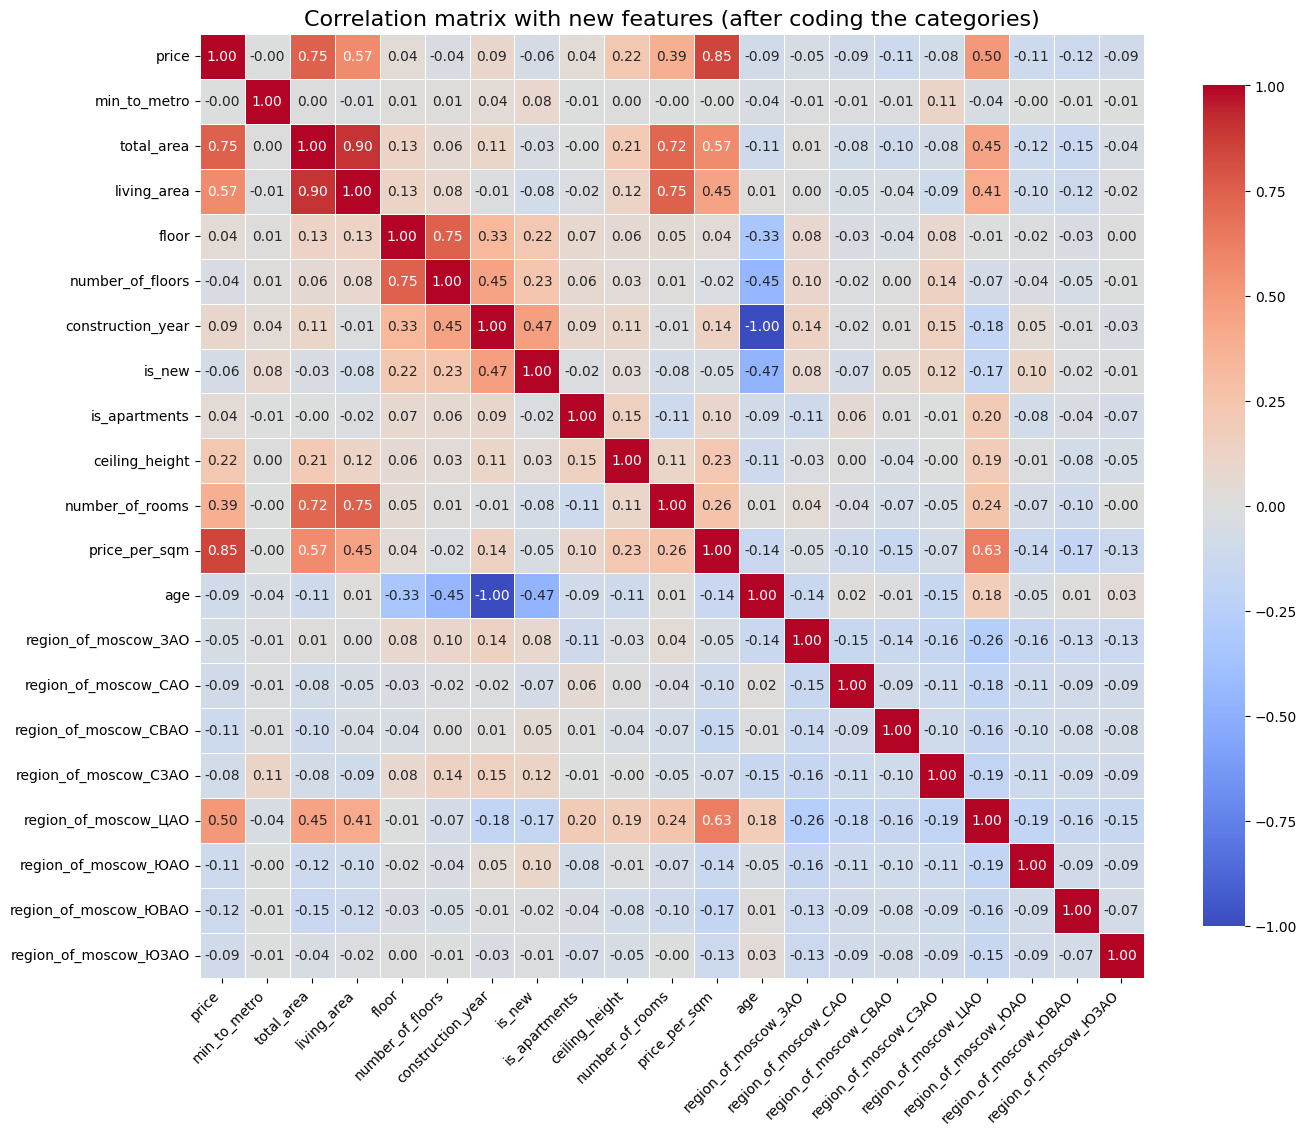

In [17]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Аскар/Downloads/data.csv')
df_encoded = df.copy()

df_encoded['price_per_sqm'] = df_encoded['price'] / df_encoded['total_area']
df_encoded['age'] = 2025 - df_encoded['construction_year']

df_encoded = df_encoded.drop(columns=['link'], errors='ignore')

df_encoded = pd.get_dummies(df_encoded, drop_first=True)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation matrix with new features (after coding the categories)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

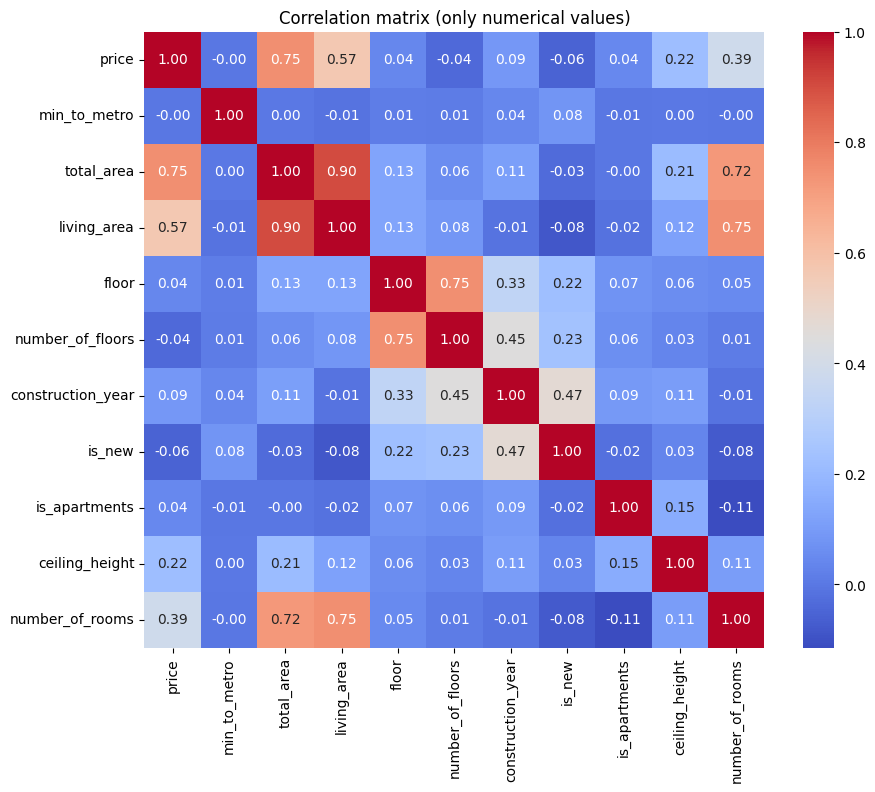

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix (only numerical values)")
plt.show()


In [19]:
# PERCENTAGE RATIO

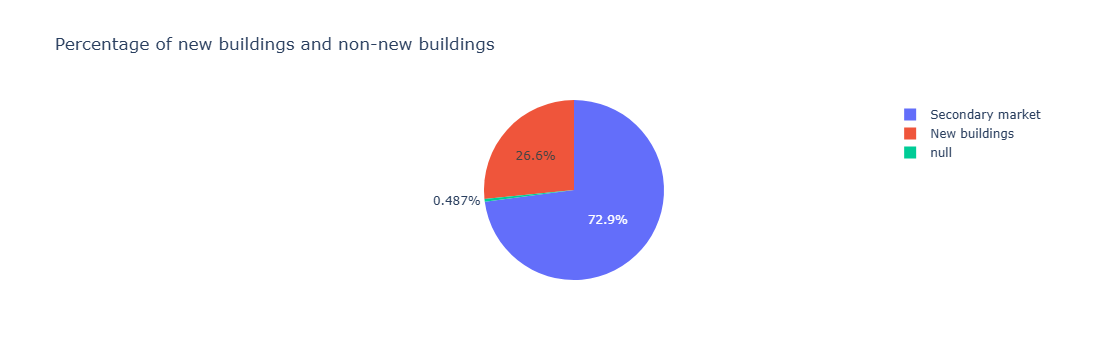

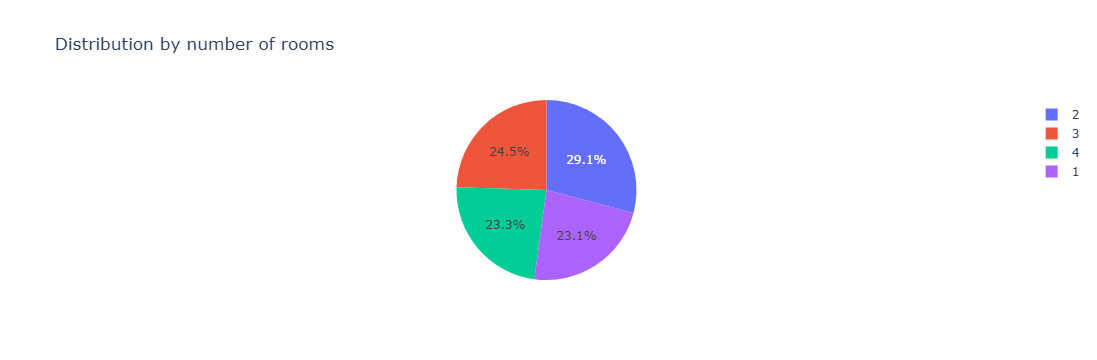

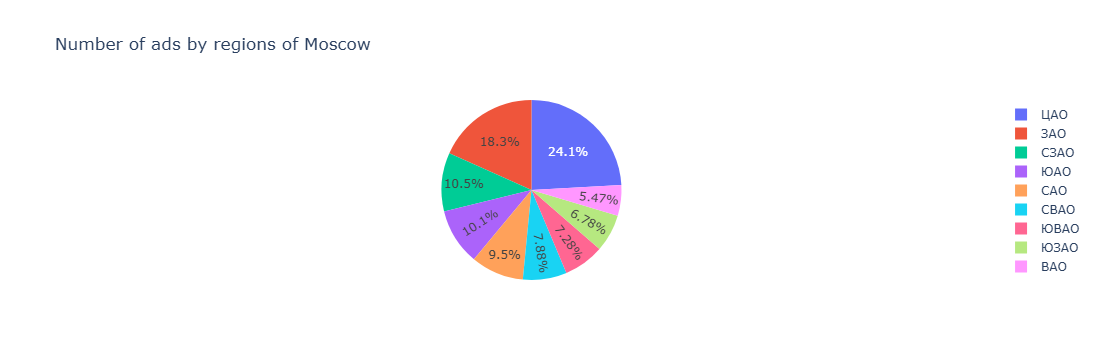

In [20]:
import plotly.express as px
import pandas as pd

df['is_new_label'] = df['is_new'].map({1: 'New buildings', 0: 'Secondary market'})

fig_is_new = px.pie(
    df, 
    names='is_new_label',
    title='Percentage of new buildings and non-new buildings'
)
fig_is_new.show()

rooms_count = df['number_of_rooms'].value_counts().reset_index()
rooms_count.columns = ['number_of_rooms', 'count']

fig_rooms = px.pie(
    rooms_count,
    names='number_of_rooms',
    values='count',
    title='Distribution by number of rooms'
)
fig_rooms.show()

region_count = df['region_of_moscow'].value_counts().reset_index()
region_count.columns = ['region_of_moscow', 'count']

fig_regions = px.pie(
    region_count,
    names='region_of_moscow',
    values='count',
    title='Number of ads by regions of Moscow'
)
fig_regions.show()


In [21]:
# DISTRIBUTION OF PRICES

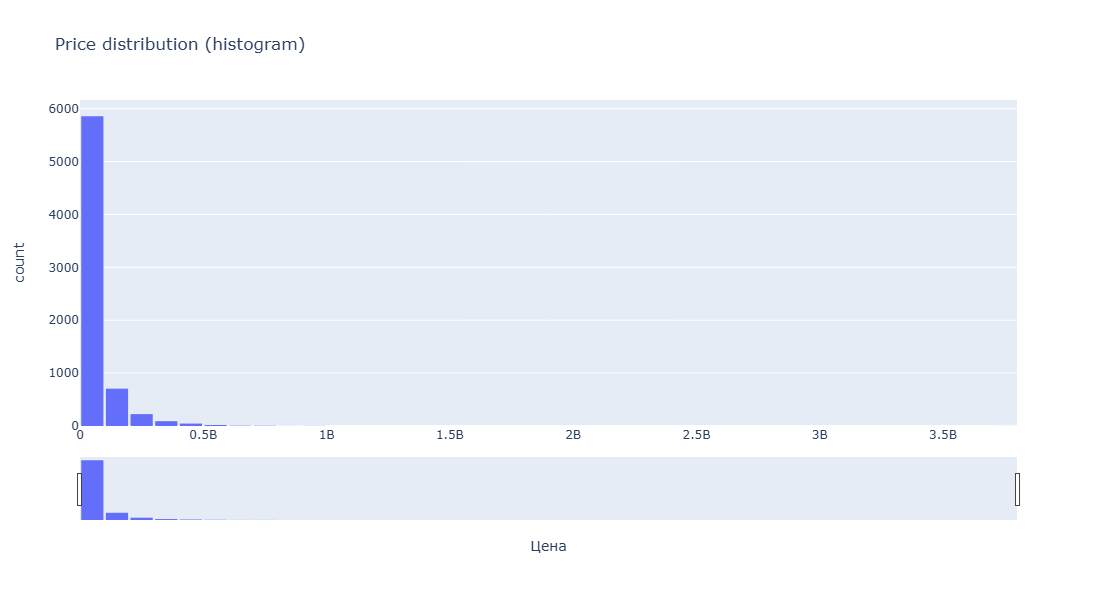

In [22]:
fig = px.histogram(df, x='price', 
                   nbins=50, 
                   title='Price distribution (histogram)',
                   labels={'price': 'Цена'},
                   width=1100,
                   height=600
                  )
fig.update_layout(bargap=0.1)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


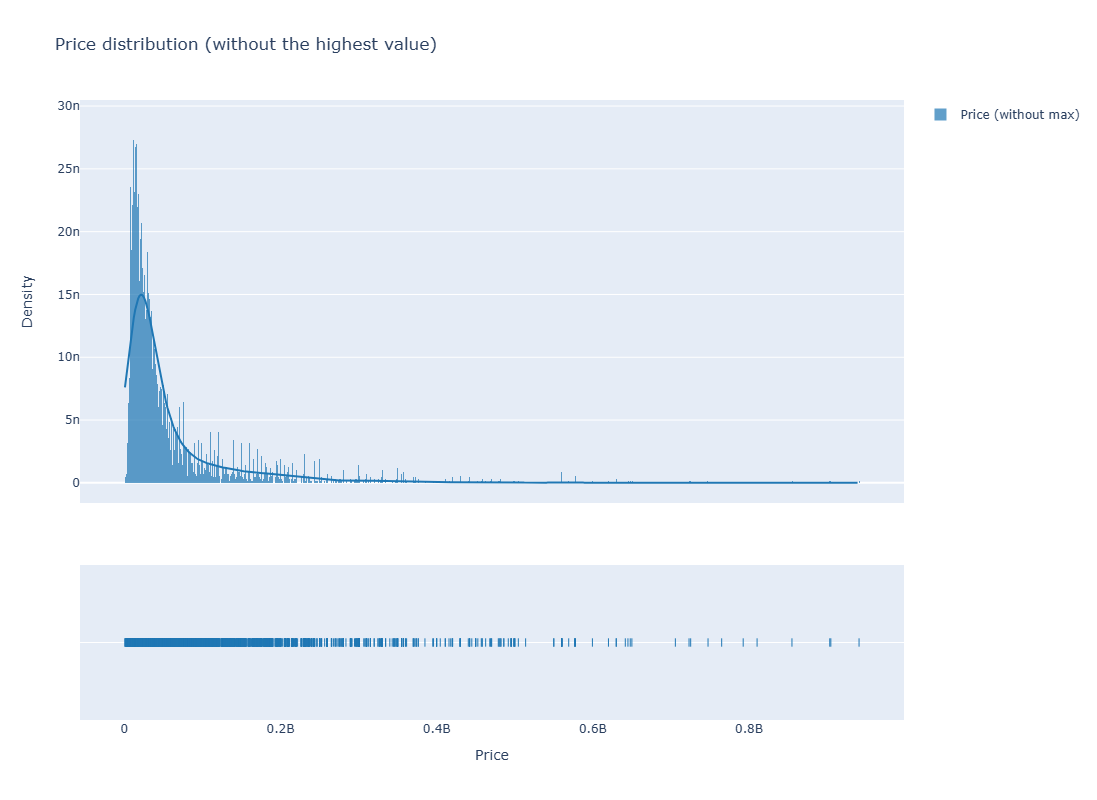

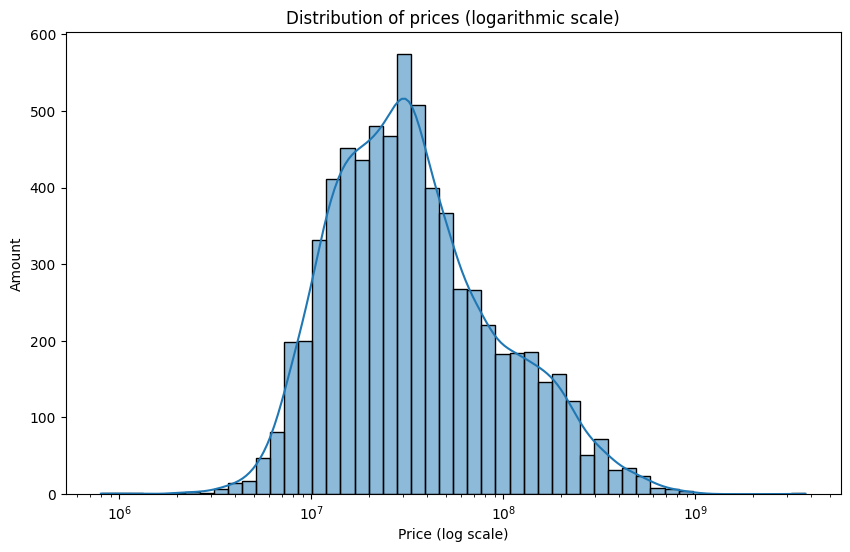

In [25]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna(subset=['price'])

max_price = df['price'].max()
df_filtered = df[df['price'] != max_price].copy()

df_filtered['price'] = df_filtered['price'].replace([np.inf, -np.inf], np.nan).dropna()

hist_data = [df_filtered['price']]
group_labels = ['Price (without max)']

fig = ff.create_distplot(
    hist_data,
    group_labels,
    bin_size=1000000,
    curve_type='kde'
)

fig.update_layout(
    title='Price distribution (without the highest value)',
    xaxis_title='Price',
    yaxis_title='Density',
    width=1100,
    height=800
)

fig.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True, bins=50, log_scale=True)
plt.title('Distribution of prices (logarithmic scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Amount')
plt.show()

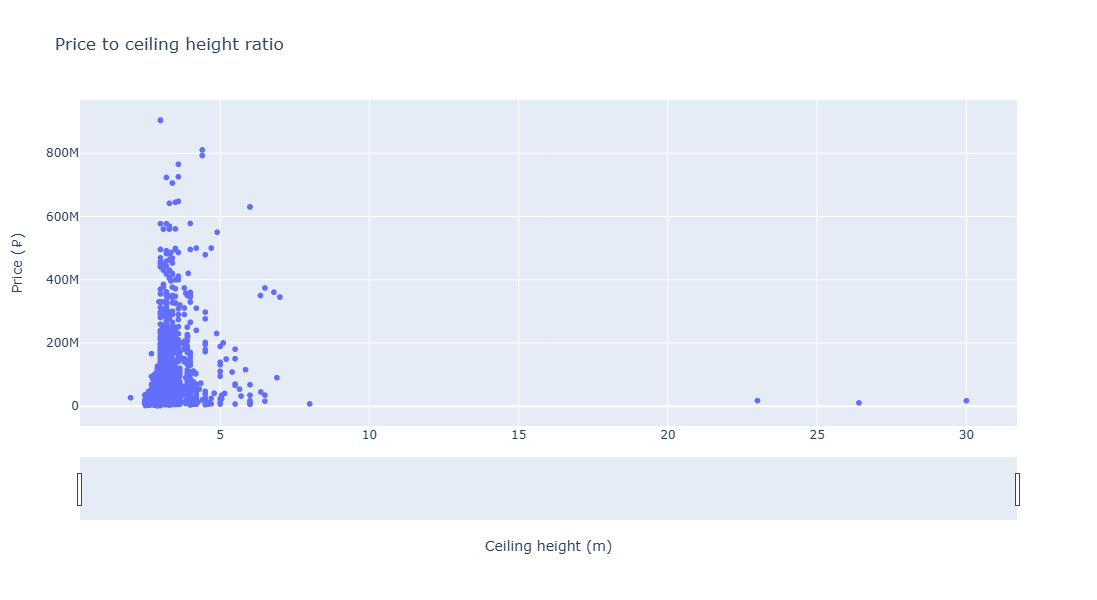

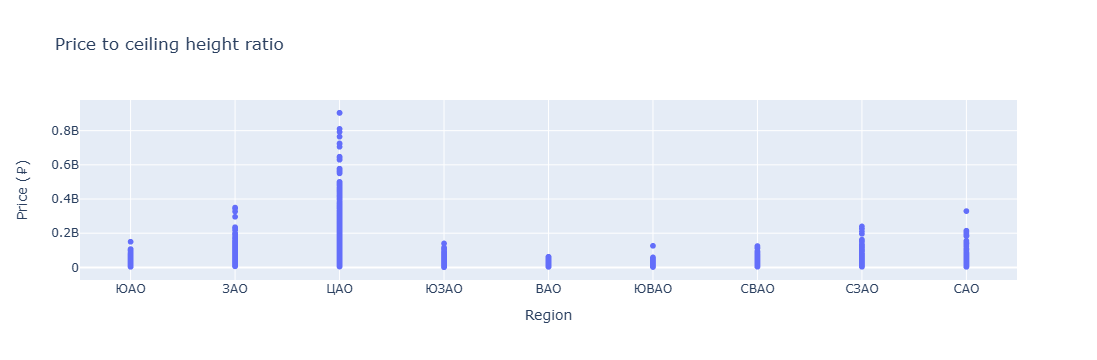

In [27]:
df_cleaned = df.dropna(subset=['price', 'ceiling_height'])


fig = px.scatter(
    df_cleaned,
    x='ceiling_height',
    y='price',
    title='Price to ceiling height ratio',
    labels={'ceiling_height': 'Ceiling height (m)', 'price': 'Price (₽)'},
    template='plotly',
    height=600
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()

df_cleaned = df.dropna(subset=['price', 'ceiling_height'])

fig = px.scatter(
    df_cleaned,
    x='region_of_moscow',
    y='price',
    title='Price to ceiling height ratio',
    labels={'region_of_moscow': 'Region', 'price': 'Price (₽)'},
    template='plotly',
    height=600
)

fig.show()

In [ ]:
# PRICE-AREA RELATIONSHIP

C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



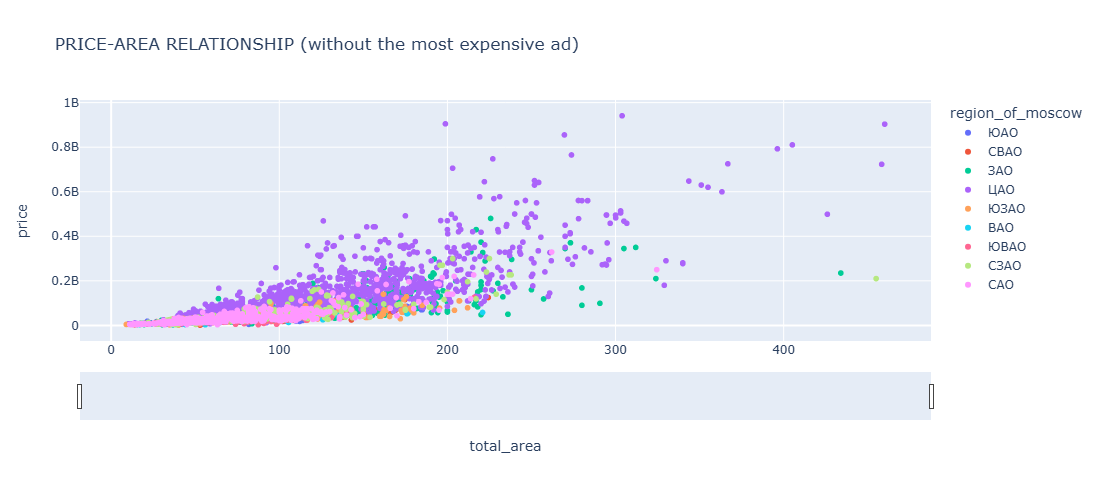

C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



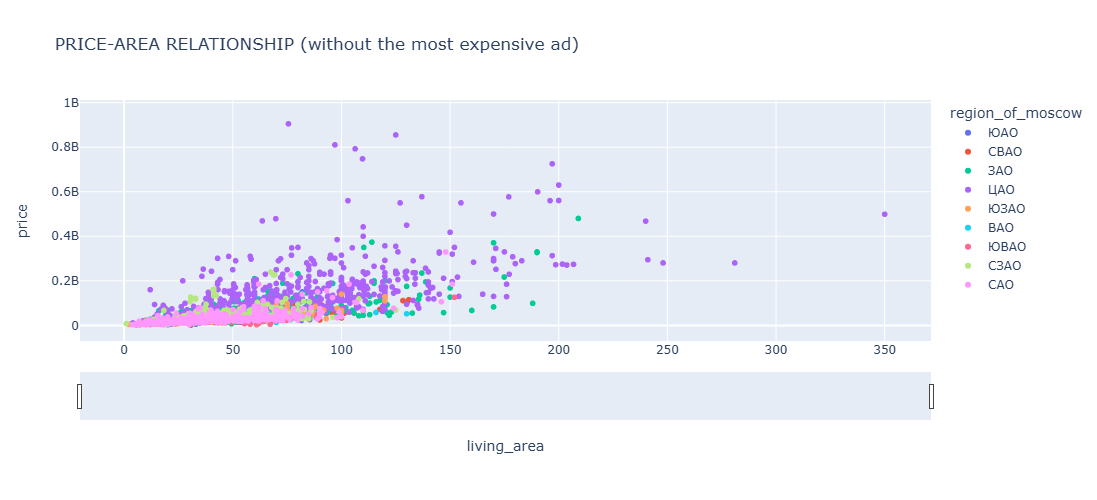

In [29]:
import plotly.express as px

max_price = df['price'].max()
df_filtered = df[df['price'] != max_price].copy()

fig = px.scatter(
    df_filtered, 
    x='total_area', 
    y='price', 
    color='region_of_moscow',
    title='PRICE-AREA RELATIONSHIP (without the most expensive ad)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()

fig = px.scatter(
    df_filtered, 
    x='living_area', 
    y='price', 
    color='region_of_moscow',
    title='PRICE-AREA RELATIONSHIP (without the most expensive ad)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



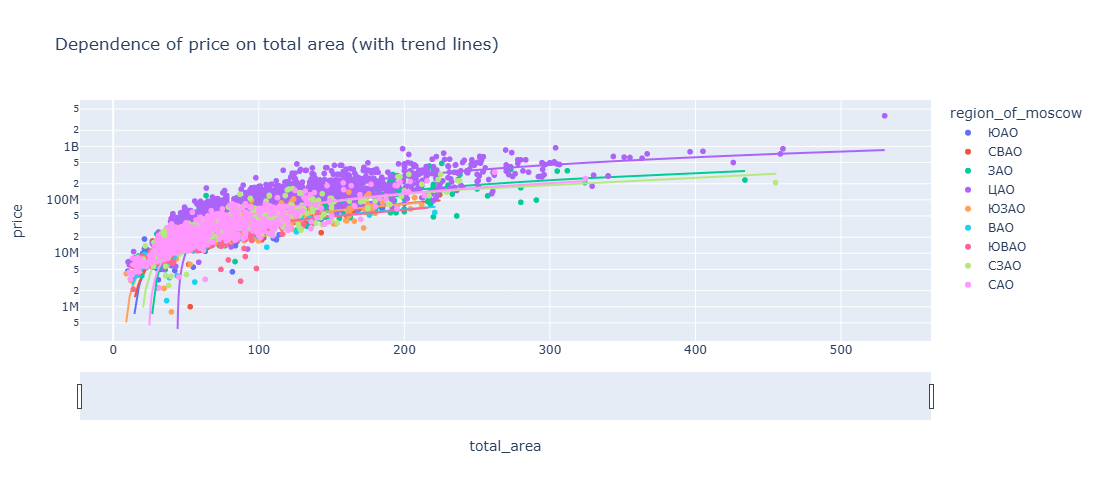

In [31]:
fig = px.scatter(
    df, 
    x='total_area', 
    y='price', 
    color='region_of_moscow',
    hover_data=['living_area', 'floor', 'number_of_rooms'],
    trendline='ols',
    title='Dependence of price on total area (with trend lines)',
    height=500
)

fig.update_yaxes(type='log')
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


In [ ]:
# PRICE PER SUARE METER

In [32]:
df['price_per_sqm'] = df['price'] / df['total_area']
df.head()


price  min_to_metro region_of_moscow  total_area  living_area  floor  \
0  31633073.0          24.0              ЮАО        64.2         32.4   11.0   
1  29293000.0           9.0             СВАО        78.1          NaN    9.0   
2  30349669.0           5.0              ЮАО        72.4         33.6    3.0   
3  31845511.0          19.0              ЮАО        69.2          NaN    2.0   
4  38810000.0          27.0              ЗАО        66.9         24.8    9.0   

   number_of_floors  construction_year  is_new  is_apartments  ceiling_height  \
0              16.0             2023.0     1.0            0.0            3.15   
1              27.0             2022.0     1.0            0.0             NaN   
2              24.0             2023.0     1.0            0.0            3.15   
3              12.0             2024.0     1.0            0.0            2.97   
4              14.0             2023.0     1.0            0.0            3.00   

   number_of_rooms                                      link   is_new_label  \
0                2  https://www.cian.ru/sale/flat/293204033/  New buildings   
1                2  https://www.cian.ru/sale/flat/294033524/  New buildings   
2                2  https://www.cian.ru/sale/flat/300712697/  New buildings   
3                2  https://www.cian.ru/sale/flat/300228448/  New buildings   
4                2  https://www.cian.ru/sale/flat/299262105/  New buildings   

   price_per_sqm  
0  492726.993769  
1  375070.422535  
2  419194.323204  
3  460195.245665  
4  580119.581465

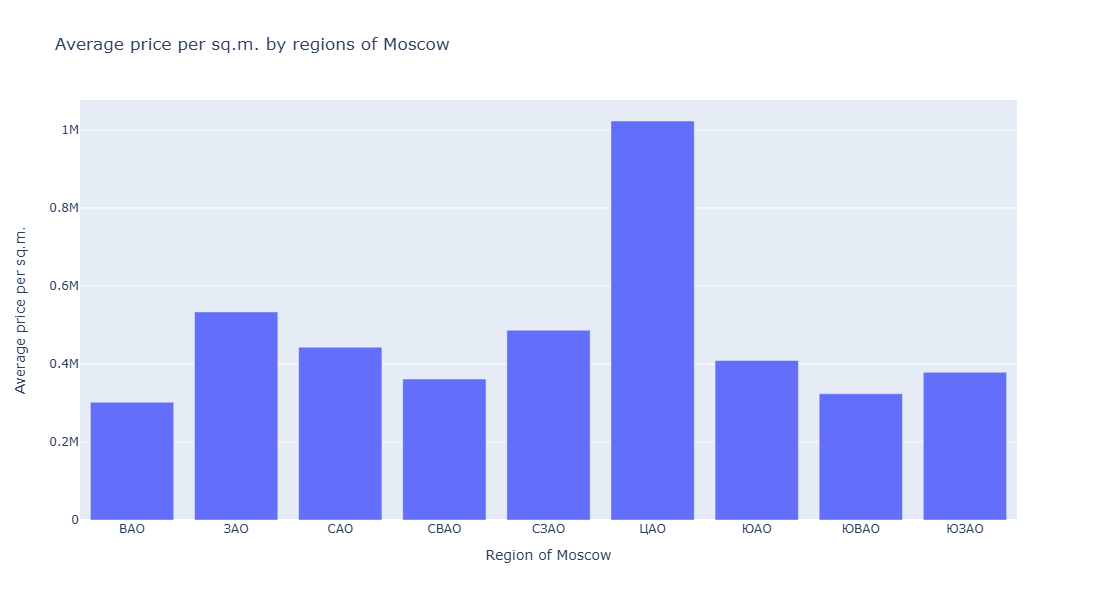

In [33]:
import pandas as pd
import plotly.express as px

avg_price_per_sqm = df.groupby('region_of_moscow')['price_per_sqm'].mean().reset_index()

fig = px.bar(
    avg_price_per_sqm,
    x='region_of_moscow',
    y='price_per_sqm',
    title='Average price per sq.m. by regions of Moscow',
    labels={'region_of_moscow': 'Region of Moscow', 'price_per_sqm': 'Average price per sq.m.'},
    height=600
)
fig.show()


C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



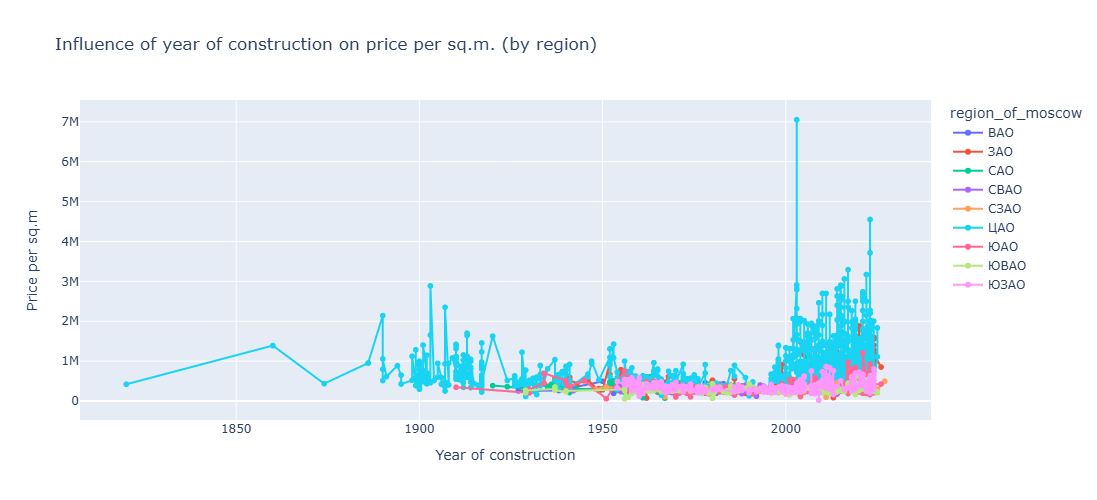

C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



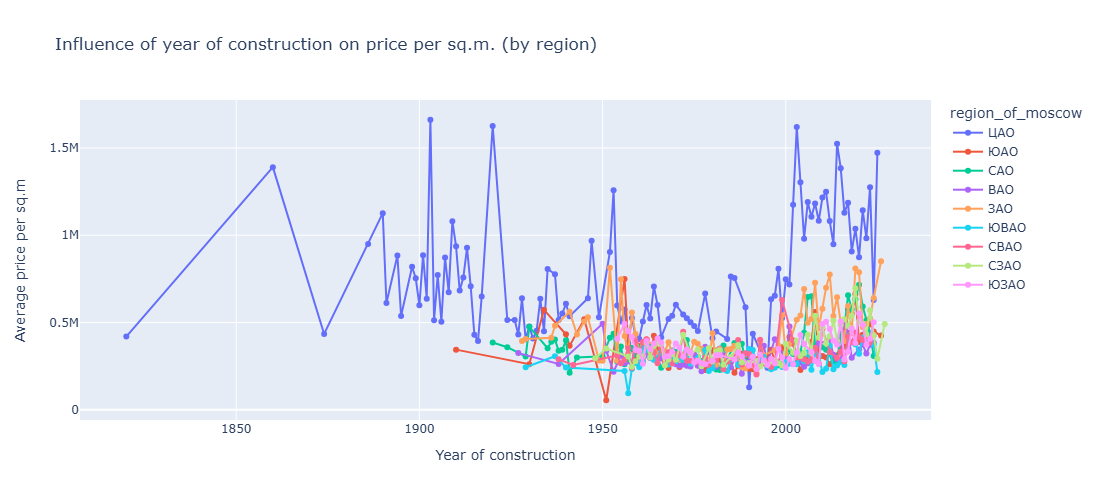

In [35]:
import pandas as pd
import plotly.express as px

df['price_per_sqm'] = df['price'] / df['total_area']

df_sorted = df.sort_values(['region_of_moscow', 'construction_year'])

fig_line = px.line(
    df_sorted,
    x='construction_year',
    y='price_per_sqm',
    color='region_of_moscow',
    markers=True,
    title='Influence of year of construction on price per sq.m. (by region)',
    height=500
)

fig_line.update_layout(
    xaxis_title='Year of construction',
    yaxis_title='Price per sq.m'
)

fig_line.show()

df['price_per_sqm'] = df['price'] / df['total_area']

df_grouped = df.groupby(['construction_year', 'region_of_moscow'], as_index=False).agg(
    avg_price_per_sqm=('price_per_sqm', 'mean')
)

fig_line = px.line(
    df_grouped,
    x='construction_year',
    y='avg_price_per_sqm',
    color='region_of_moscow',
    markers=True,
    title='Influence of year of construction on price per sq.m. (by region)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)

fig_line.update_layout(
    xaxis_title='Year of construction',
    yaxis_title='Average price per sq.m'
)

fig_line.show()


In [ ]:
# IMPACT OF PROXIMITY TO THE SUBWAY

C:\Users\Аскар\AppData\Local\Temp\ipykernel_22116\3547536083.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



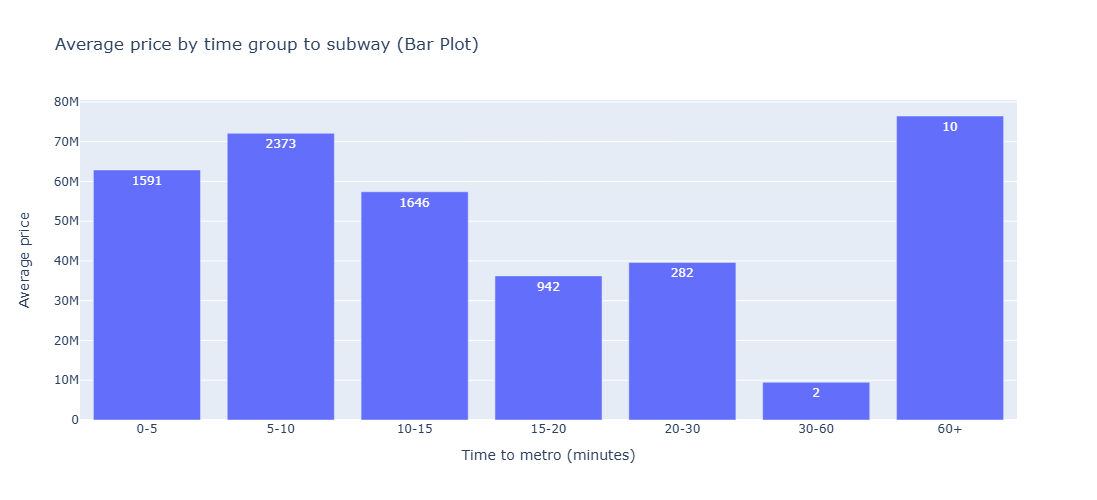

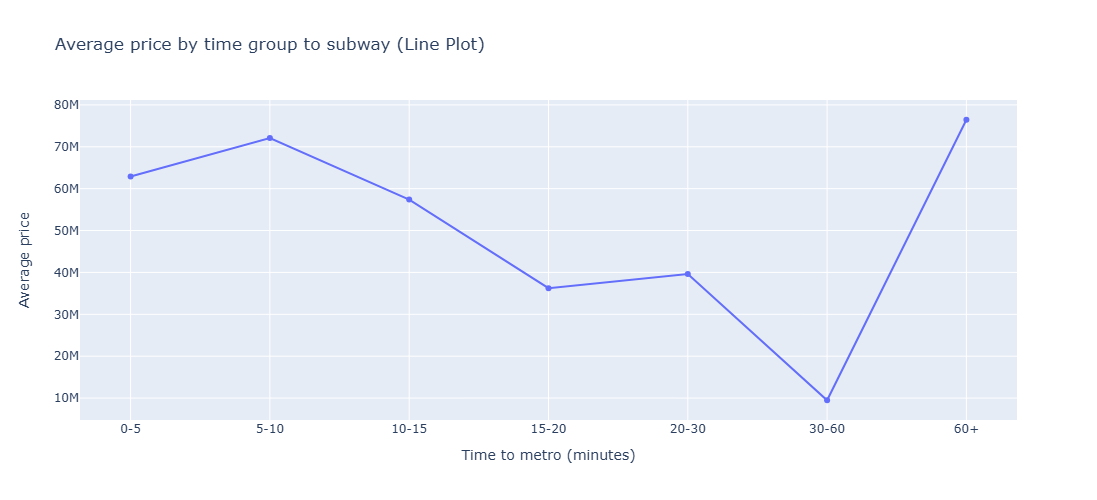

In [37]:
import pandas as pd
import plotly.express as px

bins = [0, 5, 10, 15, 20, 30, 60, float('inf')]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-60", "60+"]

df['min_to_metro_bin'] = pd.cut(
    df['min_to_metro'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)


df_grouped = df.groupby('min_to_metro_bin', as_index=False).agg(
    mean_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.bar(
    df_grouped,
    x='min_to_metro_bin', 
    y='mean_price',
    title='Average price by time group to subway (Bar Plot)',
    text='count'
)

fig.update_layout(
    xaxis_title='Time to metro (minutes)',
    yaxis_title='Average price',
    height=500
)

fig.show()

fig_line = px.line(
    df_grouped,
    x='min_to_metro_bin',
    y='mean_price',
    markers=True,
    title='Average price by time group to subway (Line Plot)'
)

fig_line.update_layout(
    xaxis_title='Time to metro (minutes)',
    yaxis_title='Average price',
    height=500
)

fig_line.show()


C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



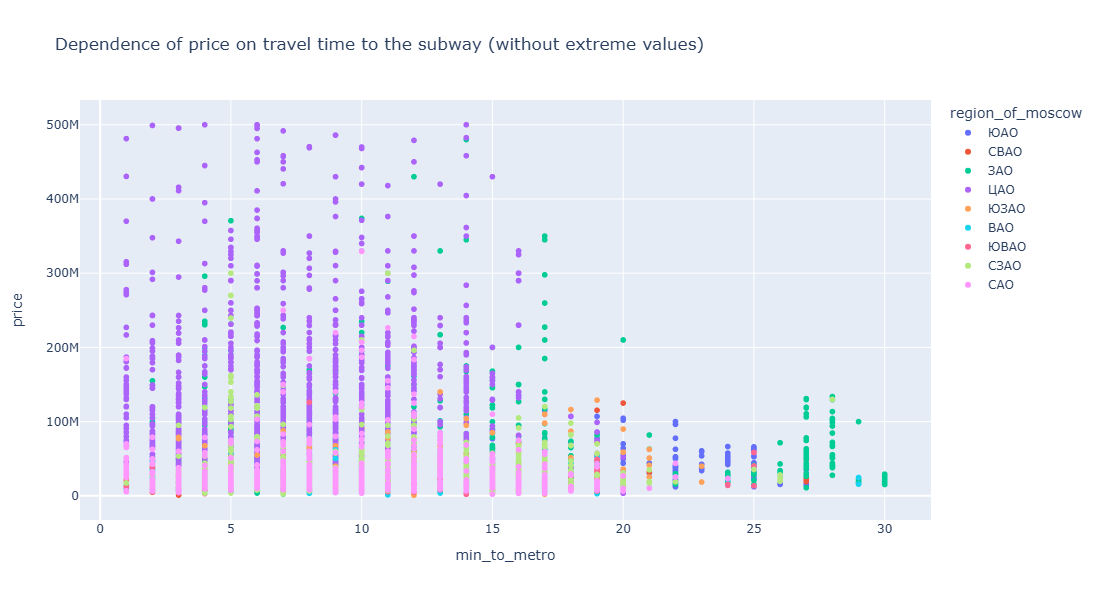

In [38]:
df_filtered = df[(df['min_to_metro'] <= 40) & (df['price'] <= 500000000)]

fig = px.scatter(
    df_filtered,
    x='min_to_metro',
    y='price',
    color='region_of_moscow',
    title='Dependence of price on travel time to the subway (without extreme values)',
    height=600
)
fig.show()


In [ ]:
# FLOOR ANALYSIS

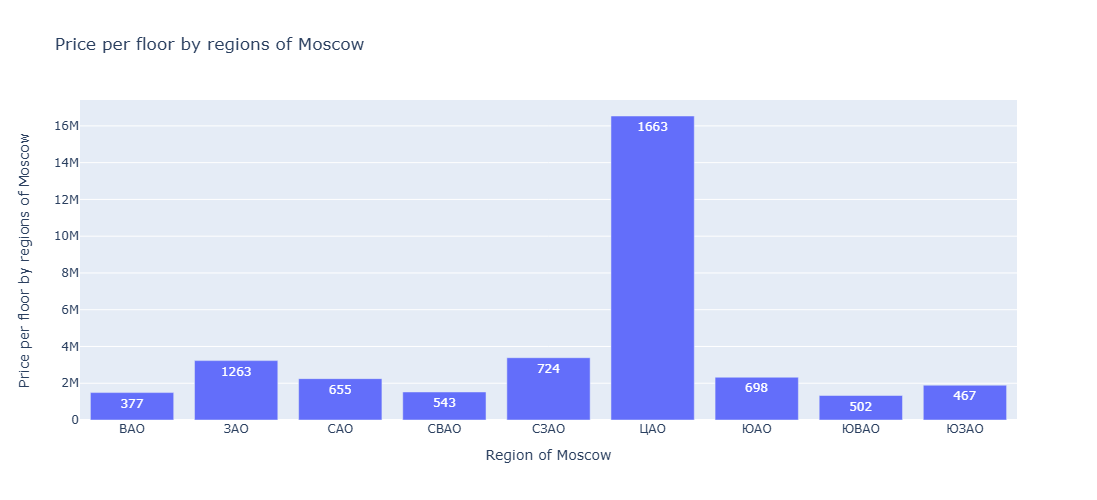

In [39]:
df['price_per_floor'] = df['price'] / df['number_of_floors']

df_region = df.groupby('region_of_moscow', as_index=False).agg(
    avg_price_per_floor=('price_per_floor', 'mean'),
    count=('price', 'count')
)

fig_region = px.bar(
    df_region,
    x='region_of_moscow',
    y='avg_price_per_floor',
    text='count',
    title='Price per floor by regions of Moscow',
    labels={'region_of_moscow': 'Region of Moscow', 'avg_price_per_floor': 'Price per floor by regions of Moscow'},
    height=500
)

fig_region.update_layout(xaxis=dict(type='category'))
fig_region.show()


C:\Users\Аскар\AppData\Local\Temp\ipykernel_22116\4011308271.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



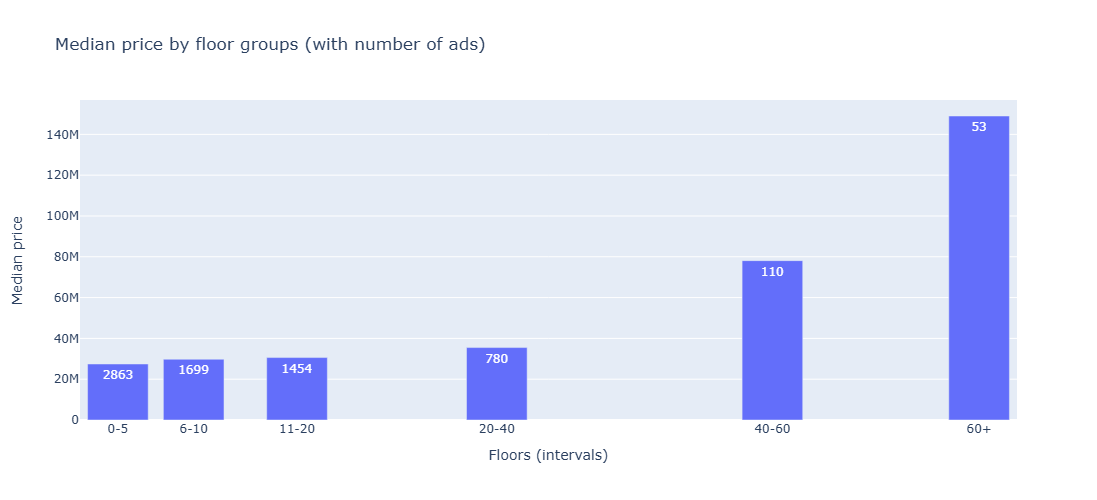

In [40]:
import pandas as pd
import plotly.express as px
bins = [0, 5, 10, 20, 40, 60, float('inf')]
labels = ["0-5", "6-10", "11-20", "20-40", "40-60", "60+"]

df['floor_bin'] = pd.cut(
    df['floor'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

bin_midpoints = {
    "0-5": 2.5,
    "6-10": 8,     # (6+10)/2 = 8
    "11-20": 15.5, # (11+20)/2 = 15.5
    "20-40": 30,   # (20+40)/2 = 30
    "40-60": 50,   # (40+60)/2 = 50
    "60+": 65
}

df_floor_grouped = df.groupby('floor_bin', as_index=False).agg(
    median_price=('price', 'median'),
    count=('price', 'count')
)

df_floor_grouped['floor_bin_num'] = df_floor_grouped['floor_bin'].map(bin_midpoints)

fig = px.bar(
    df_floor_grouped,
    x='floor_bin_num',
    y='median_price',
    text='count',
    title='Median price by floor groups (with number of ads)',
    labels={'floor_bin_num': 'Floors (intervals)', 'median_price': 'Median price'},
    height=500
)

fig.update_layout(
    # bargap=0,
    xaxis=dict(
        tickmode='array',
        tickvals=list(bin_midpoints.values()),
        ticktext=list(bin_midpoints.keys()),
        # rangeslider=dict(visible=True)
    )
)

fig.show()


In [ ]:
# IMPACT OF THE YEAR OF CONSTRUCTION 

C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



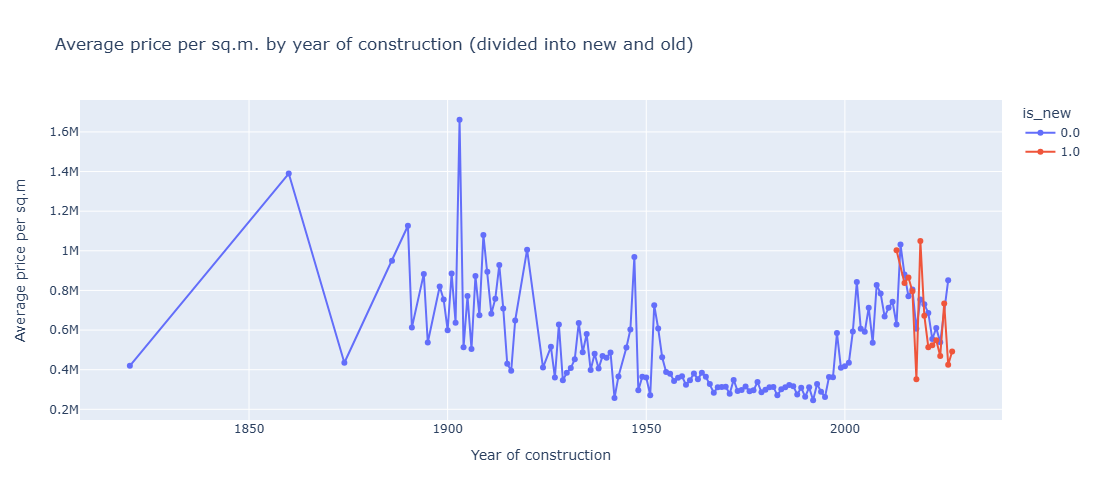

In [41]:
df['price_per_sqm'] = df['price'] / df['total_area']

# EXCLUSION OF ANOMALOUS VALUES:
# df = df[(df['construction_year'] >= 1900) & (df['construction_year'] <= 2025)]

df_grouped = df.groupby(['construction_year', 'is_new'], as_index=False).agg(
    avg_price_per_sqm=('price_per_sqm', 'mean'),
    count=('price', 'count')
)

fig_line = px.line(
    df_grouped.sort_values('construction_year'),
    x='construction_year',
    y='avg_price_per_sqm',
    color='is_new',
    markers=True,
    title='Average price per sq.m. by year of construction (divided into new and old)',
    height=500
)

fig_line.update_layout(
    xaxis_title='Year of construction',
    yaxis_title='Average price per sq.m'
)

fig_line.show()


In [ ]:
# ANALYSIS BY NUMBER OF ROOMS

C:\Users\Аскар\AppData\Roaming\Python\Python312\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



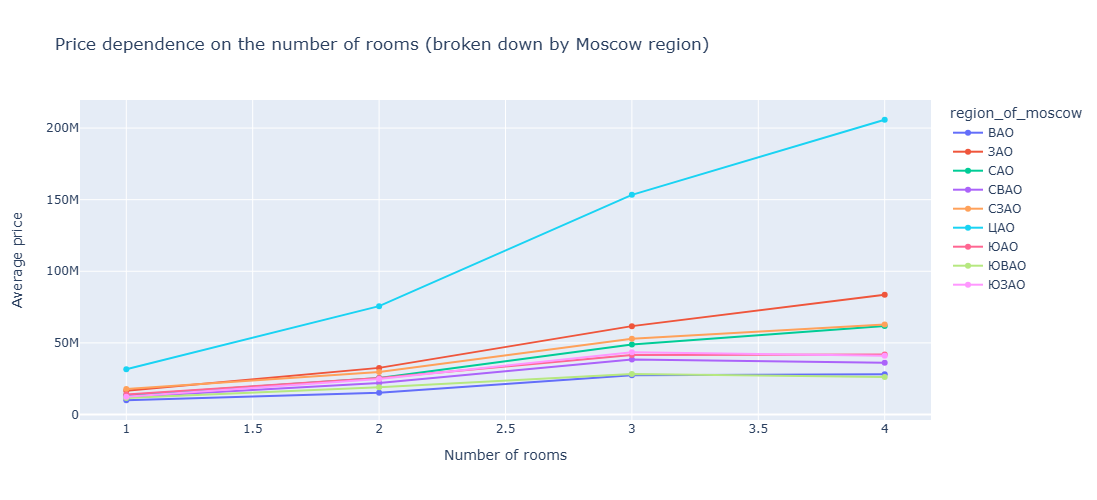

In [42]:
import pandas as pd
import plotly.express as px

df_grouped = df.groupby(['number_of_rooms', 'region_of_moscow'], as_index=False).agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.line(
    df_grouped.sort_values('number_of_rooms'),
    x='number_of_rooms',
    y='avg_price',
    color='region_of_moscow',
    markers=True,
    title='Price dependence on the number of rooms (broken down by Moscow region)',
    height=500,
    hover_data=['count']
)

fig.update_layout(
    xaxis_title='Number of rooms',
    yaxis_title='Average price'
)

fig.show()


In [ ]:
# LIVING AREA TO TOTAL AREA RATIO

In [ ]:
import pandas as pd
import plotly.express as px

df['ratio'] = df['living_area'] / df['total_area']

df['ratio_round'] = df['ratio'].round(2)

df_grouped = df.groupby(['ratio_round', 'region_of_moscow'], as_index=False).agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.line(
    df_grouped.sort_values('ratio_round'),
    x='ratio_round',
    y='avg_price',
    color='region_of_moscow',
    markers=True,
    title='Price dependence on the living/total area ratio (broken down by Moscow region)',
    height=650,
    hover_data=['count']
)

fig.update_layout(
    xaxis_title='Living area / Total area',
    yaxis_title='Average price'
)

fig.show()


In [ ]:
# JUST A FANCY GRAPH

In [43]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import VBox, interactive_output

regions = ["All"] + sorted(df["region_of_moscow"].dropna().astype(str).unique().tolist())

rooms_min = int(df["number_of_rooms"].min())
rooms_max = int(df["number_of_rooms"].max())

is_new_options = ["All", 0, 1]

def update_dashboard(selected_region, rooms_range, selected_is_new):
    dff = df.copy()

    if selected_region != "All":
        dff = dff[dff["region_of_moscow"].astype(str) == selected_region]
    
    dff = dff[(dff["number_of_rooms"] >= rooms_range[0]) & (dff["number_of_rooms"] <= rooms_range[1])]
    
    if selected_is_new != "All":
        dff = dff[dff["is_new"] == selected_is_new]
    
    dff = dff.dropna(subset=["living_area", "total_area", "price"])
    
    fig = px.scatter(
        dff,
        x="total_area",
        y="price",
        color="region_of_moscow",
        size="living_area",
        hover_data=["number_of_rooms", "is_new"],
        height=500,
        title="Dependence of the price on the total area"
    )
    fig.update_layout(
        xaxis_title="Total area",
        yaxis_title="Price"
    )
    fig.show()

region_widget = widgets.Dropdown(
    options=regions,
    value="All",
    description="Region:",
    disabled=False,
)

rooms_widget = widgets.IntRangeSlider(
    value=[rooms_min, rooms_max],
    min=rooms_min,
    max=rooms_max,
    step=1,
    description='Rooms:',
    continuous_update=False
)

is_new_widget = widgets.Dropdown(
    options=is_new_options,
    value="All",
    description="New building:",
    disabled=False,
)

ui = VBox([region_widget, rooms_widget, is_new_widget])

out = interactive_output(update_dashboard, {
    "selected_region": region_widget,
    "rooms_range": rooms_widget,
    "selected_is_new": is_new_widget
})

display(ui, out)


Output()